In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define folder path where the data files are located
data_folder = r"C:\Users\mohsi\OneDrive\Documents\University\Semester 2\Methods of Advanced Data Engineering\made-aj52efem\data"

# Function to find files with specific substrings in the folder
def find_files_with_substring(folder, substrings):
    files = []
    for file in os.listdir(folder):
        if any(sub in file for sub in substrings):
            files.append(os.path.join(folder, file))
    return files

# Define substrings to search for
emission_substring = "ghg_emissions"
gdp_substring = "gdp_by_industry"

# Find the relevant files
emission_file = find_files_with_substring(data_folder, [emission_substring])[0]
gdp_file = find_files_with_substring(data_folder, [gdp_substring])[0]

# Read the CSV files
emission_data = pd.read_csv(emission_file)
gdp_data = pd.read_csv(gdp_file)

# Filter the relevant industries for emissions
emission_industries = [
    "Greenhouse gas emissions from agriculture",
    "Greenhouse gas emissions from land use change and forestry",
    "Greenhouse gas emissions from waste",
    "Greenhouse gas emissions from buildings",
    "Greenhouse gas emissions from manufacturing and construction",
    "Greenhouse gas emissions from transport",
    "Greenhouse gas emissions from electricity and heat",
    "Greenhouse gas emissions from other fuel combustion"
]
emission_filtered = emission_data.loc[:, ["Entity", "Code", "Year"] + emission_industries]

# Filter the relevant industries for GDP
gdp_industries = [
    "Agriculture, forestry, fishing, and hunting",
    "Forestry, fishing, and related activities",
    "Administrative and waste management services",
    "Real estate and rental and leasing",
    "Construction",
    "Transportation and warehousing",
    "Electrical equipment, appliances, and components",
    "Petroleum and coal products"
]
gdp_filtered = gdp_data[gdp_data["Description"].isin(gdp_industries)]

# Save filtered data for review
emission_filtered.to_csv("filtered_emissions.csv", index=False)
gdp_filtered.to_csv("filtered_gdp.csv", index=False)

print("Data filtering complete. Filtered files saved as 'filtered_emissions.csv' and 'filtered_gdp.csv'.")


Data filtering complete. Filtered files saved as 'filtered_emissions.csv' and 'filtered_gdp.csv'.


In [19]:
gdp_filtered

,Line,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Description,,,,,,,,,,,,
"Agriculture, forestry, fishing, and hunting",1,145.7,179.9,179.5,215.8,200.6,182.1,167.5,176.8,177.1,164.2,162.9
"Forestry, fishing, and related activities",3,28.7,28.8,30.7,31.4,33.5,35.9,37.2,38.1,40.3,41.6,43.9
Construction,9,525.7,525.6,554.9,594.7,649.9,715.3,776.8,840.2,889.1,953.0,957.8
Petroleum and coal products,18,123.8,159.1,159.1,146.6,147.8,131.4,76.0,110.7,154.2,143.4,60.5
"Electrical equipment, appliances, and components",26,50.8,48.3,52.2,57.5,53.4,61.4,56.0,57.6,59.8,60.1,57.7
Transportation and warehousing,44,433.5,452.5,473.3,497.4,533.6,583.9,603.0,635.5,677.3,710.0,638.7
Real estate and rental and leasing,57,1997.2,2058.3,2119.7,2215.2,2274.2,2338.0,2419.9,2525.0,2683.4,2805.9,2910.6
Administrative and waste management services,65,438.0,455.0,474.9,490.1,518.3,540.3,559.2,602.9,638.7,670.2,648.9


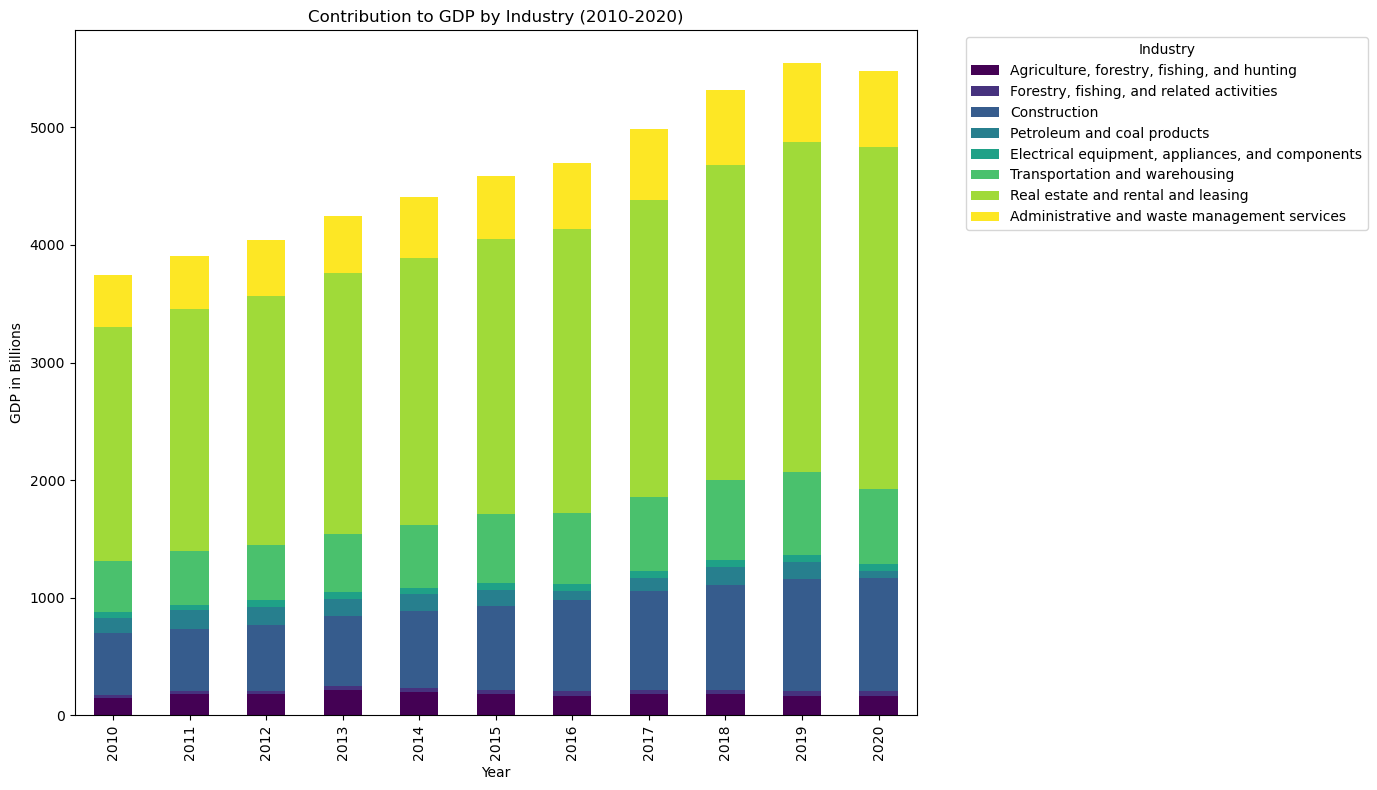

In [4]:
import matplotlib.pyplot as plt

# Assuming 'bea_filtered' is your filtered DataFrame for BEA data
bea_filtered = gdp_filtered

# Set 'Description' as the index
bea_filtered.set_index('Description', inplace=True)

# Select only the columns corresponding to years (2010-2020)
bea_filtered_years = bea_filtered.loc[:, '2010':'2020']

# Plotting the data
bea_filtered_years.transpose().plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title("Contribution to GDP by Industry (2010-2020)")
plt.ylabel("GDP in Billions")
plt.xlabel("Year")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [5]:
emission_filtered.columns 


Index(['Entity', 'Code', 'Year', 'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from land use change and forestry',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from electricity and heat',
       'Greenhouse gas emissions from other fuel combustion'],
      dtype='object')

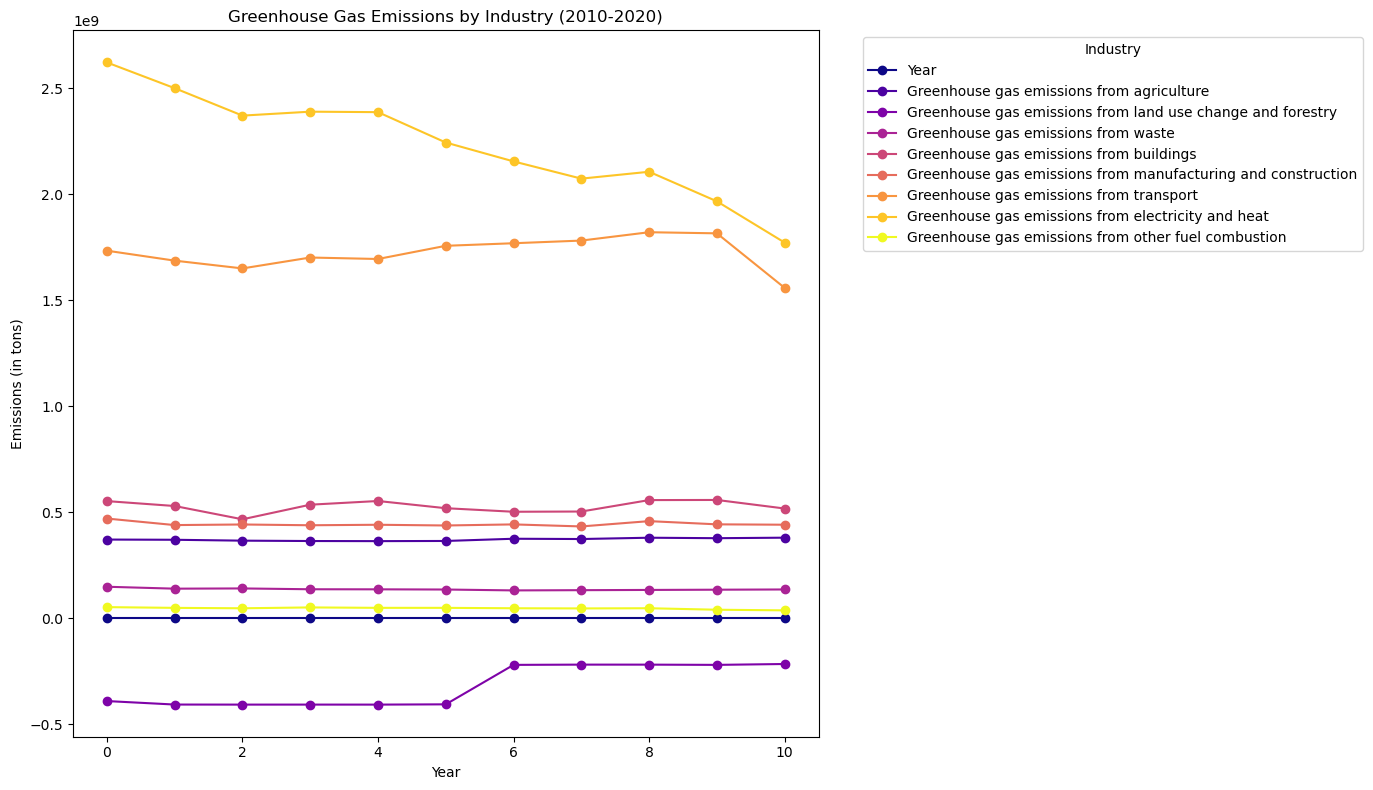

In [6]:
import matplotlib.pyplot as plt

# Assuming 'emission_filtered' is your filtered DataFrame
# Transpose to have years as rows and industries as columns

# Plotting the data using a line chart
emission_filtered.plot(kind='line', figsize=(14, 8), marker='o', colormap='plasma')
plt.title("Greenhouse Gas Emissions by Industry (2010-2020)")
plt.ylabel("Emissions (in tons)")
plt.xlabel("Year")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [7]:
# Transpose 'bea_filtered' (GDP data) to have years as rows and industries as columns
bea_filtered = bea_filtered.transpose()

# Transpose 'emission_filtered' (emission data) to have years as rows and emission categories as columns


In [8]:
emission_filtered

,Entity,Code,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Greenhouse gas emissions from other fuel combustion
0,United States,USA,2010,370829980.0,-390820000.0,148270000.0,552170000.0,469900000.0,1.733120e+09,2.620930e+09,52110000.0
1,United States,USA,2011,369820000.0,-407280000.0,139230000.0,529050000.0,439100000.0,1.686210e+09,2.499530e+09,48700000.0
2,United States,USA,2012,365640000.0,-407560000.0,140310000.0,466350000.0,441920000.0,1.649510e+09,2.370170e+09,46710000.0
3,United States,USA,2013,363920000.0,-407490000.0,136430000.0,535270000.0,438240000.0,1.700900e+09,2.388770e+09,50770000.0
4,United States,USA,2014,363400000.0,-407580000.0,136100000.0,552640000.0,440620000.0,1.693990e+09,2.386490e+09,48780000.0
5,United States,USA,2015,364190000.0,-406300000.0,135200000.0,518710000.0,437190000.0,1.756190e+09,2.243240e+09,48740000.0
6,United States,USA,2016,374660000.0,-220190000.0,131030000.0,501940000.0,442309980.0,1.768300e+09,2.154190e+09,46850000.0
7,United States,USA,2017,373330000.0,-218990000.0,132130010.0,503029980.0,432700000.0,1.780840e+09,2.072960e+09,46030000.0
8,United States,USA,2018,379500000.0,-219060000.0,133240010.0,556970000.0,457690020.0,1.820220e+09,2.105400e+09,46910000.0
9,United States,USA,2019,377260000.0,-220190000.0,134350000.0,557570000.0,442600000.0,1.814990e+09,1.965920e+09,39900000.0


In [9]:
# Find the industry with the highest average contribution to GDP over the period (2010-2020)
most_contributing_industry_gdp = bea_filtered.mean(axis=0).idxmax()
max_contribution_gdp = bea_filtered.mean(axis=0).max()

print(f"Industry with the most contribution to GDP: {most_contributing_industry_gdp}")
print(f"Maximum average contribution to GDP: {max_contribution_gdp}")


Industry with the most contribution to GDP: Real estate and rental and leasing
Maximum average contribution to GDP: 2200.366666666667


In [12]:
# Remove non-numeric columns ('Entity' and 'Code') from the emission_filtered DataFrame
emission_filtered_cleaned = emission_filtered.drop(columns=['Entity', 'Code'])

# Now you can calculate the mean or perform other analysis


In [13]:
# 2.2 Which emission category has contributed the most to emissions over the entire period?
most_contributing_emission = emission_filtered_cleaned.mean(axis=0).idxmax()
max_contribution_emission = emission_filtered_cleaned.mean(axis=0).max()

print(f"Emission category with the most contribution to emissions: {most_contributing_emission}")
print(f"Maximum average contribution to emissions: {max_contribution_emission}")


Emission category with the most contribution to emissions: Greenhouse gas emissions from electricity and heat
Maximum average contribution to emissions: 2234444509.090909


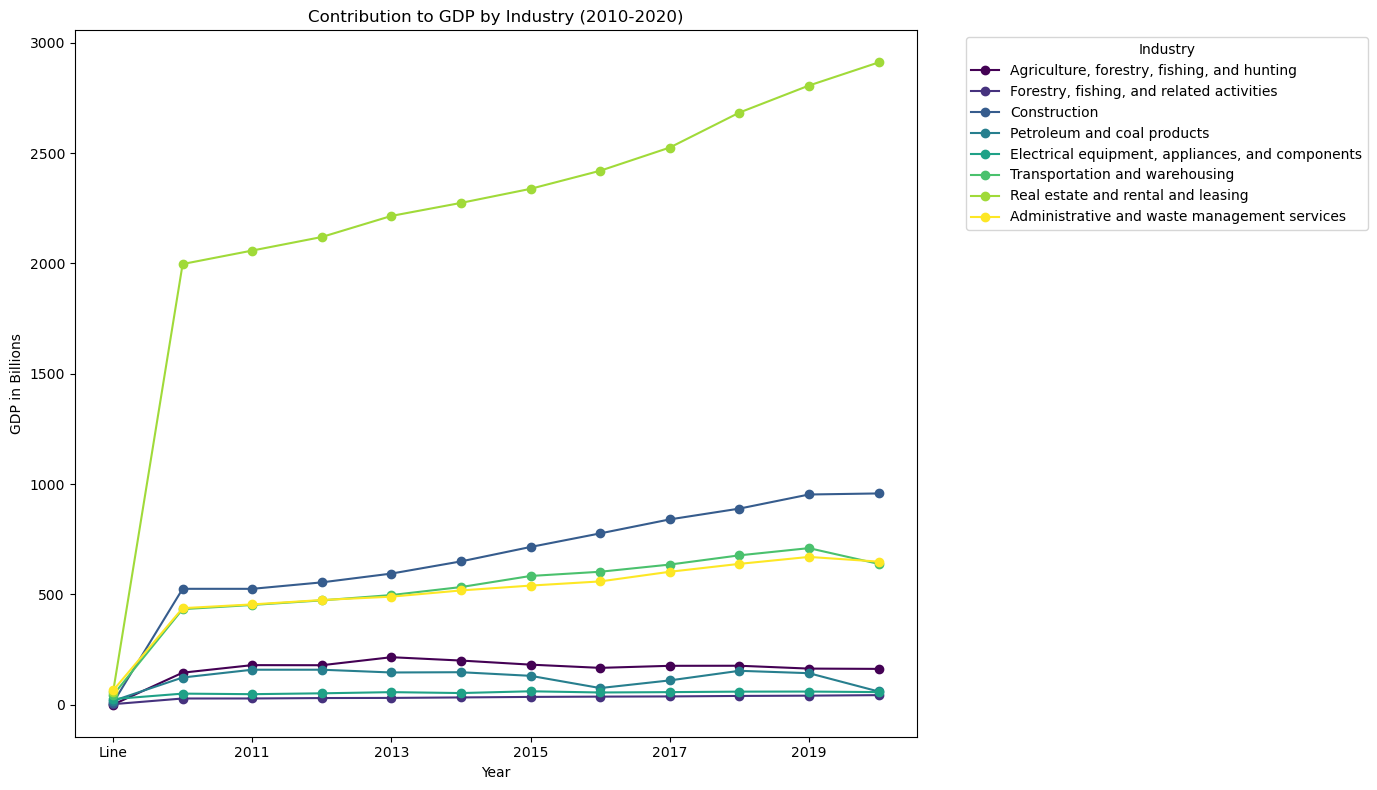

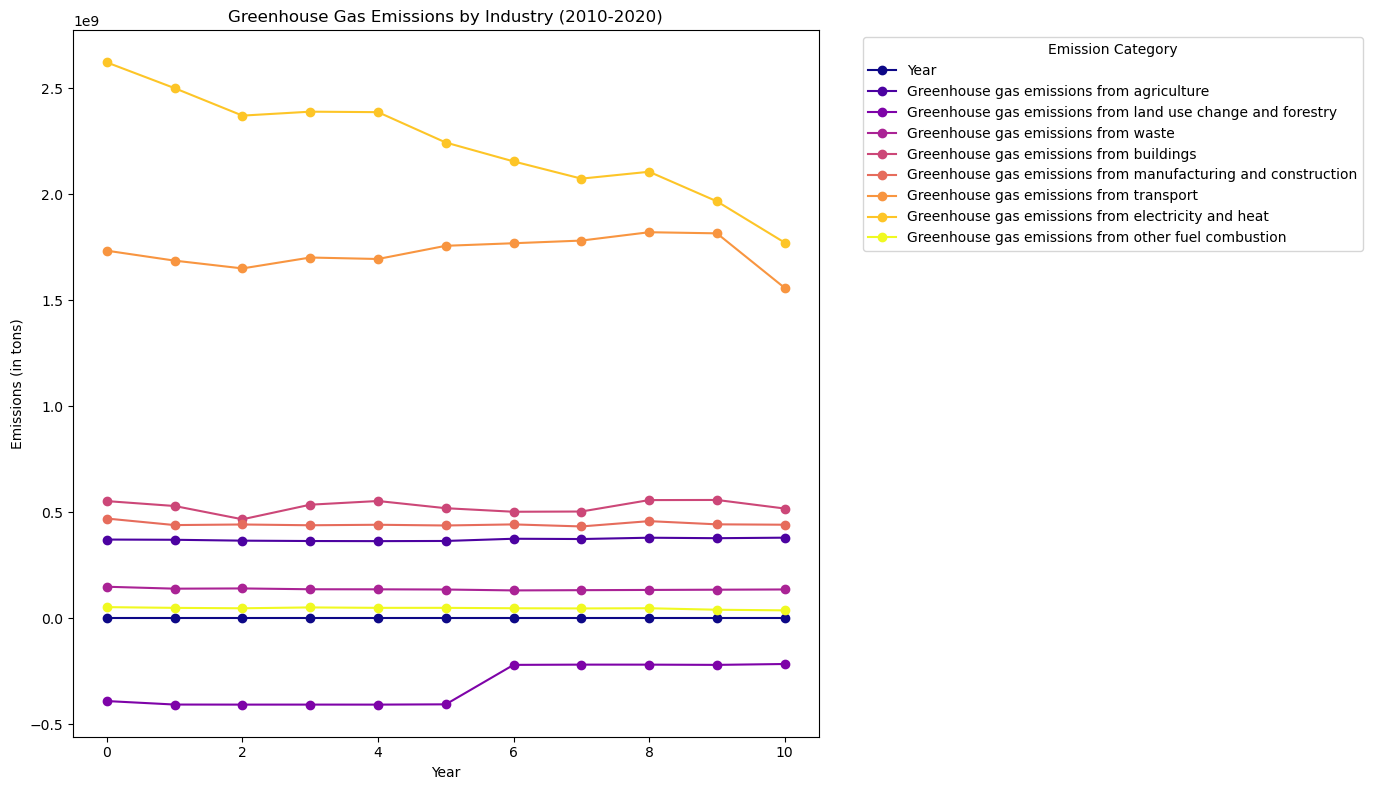

In [14]:
# Plot trends for each industry’s contribution to GDP over time
bea_filtered.plot(kind='line', figsize=(14, 8), marker='o', colormap='viridis')
plt.title("Contribution to GDP by Industry (2010-2020)")
plt.ylabel("GDP in Billions")
plt.xlabel("Year")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot trends for each emission category’s emissions over time
emission_filtered.plot(kind='line', figsize=(14, 8), marker='o', colormap='plasma')
plt.title("Greenhouse Gas Emissions by Industry (2010-2020)")
plt.ylabel("Emissions (in tons)")
plt.xlabel("Year")
plt.legend(title="Emission Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [15]:
# Calculate the growth of each industry from 2010 to 2020
industry_growth_gdp = bea_filtered.iloc[-1] - bea_filtered.iloc[0]

# Find the industry with the highest growth
most_growth_industry_gdp = industry_growth_gdp.idxmax()
growth_value_gdp = industry_growth_gdp.max()

print(f"Industry with the most significant growth in GDP: {most_growth_industry_gdp}")
print(f"Growth value in GDP: {growth_value_gdp}")


Industry with the most significant growth in GDP: Real estate and rental and leasing
Growth value in GDP: 2853.6


In [17]:
# Calculate the standard deviation (volatility) of each industry’s contribution to GDP
industry_volatility_gdp = bea_filtered.std(axis=0)

# Find the industry with the highest volatility
most_volatile_industry_gdp = industry_volatility_gdp.idxmax()
volatility_value_gdp = industry_volatility_gdp.max()

print(f"Industry with the most volatile impact on GDP: {most_volatile_industry_gdp}")
print(f"Volatility value in GDP: {volatility_value_gdp}")


Industry with the most volatile impact on GDP: Real estate and rental and leasing
Volatility value in GDP: 735.1318141955389


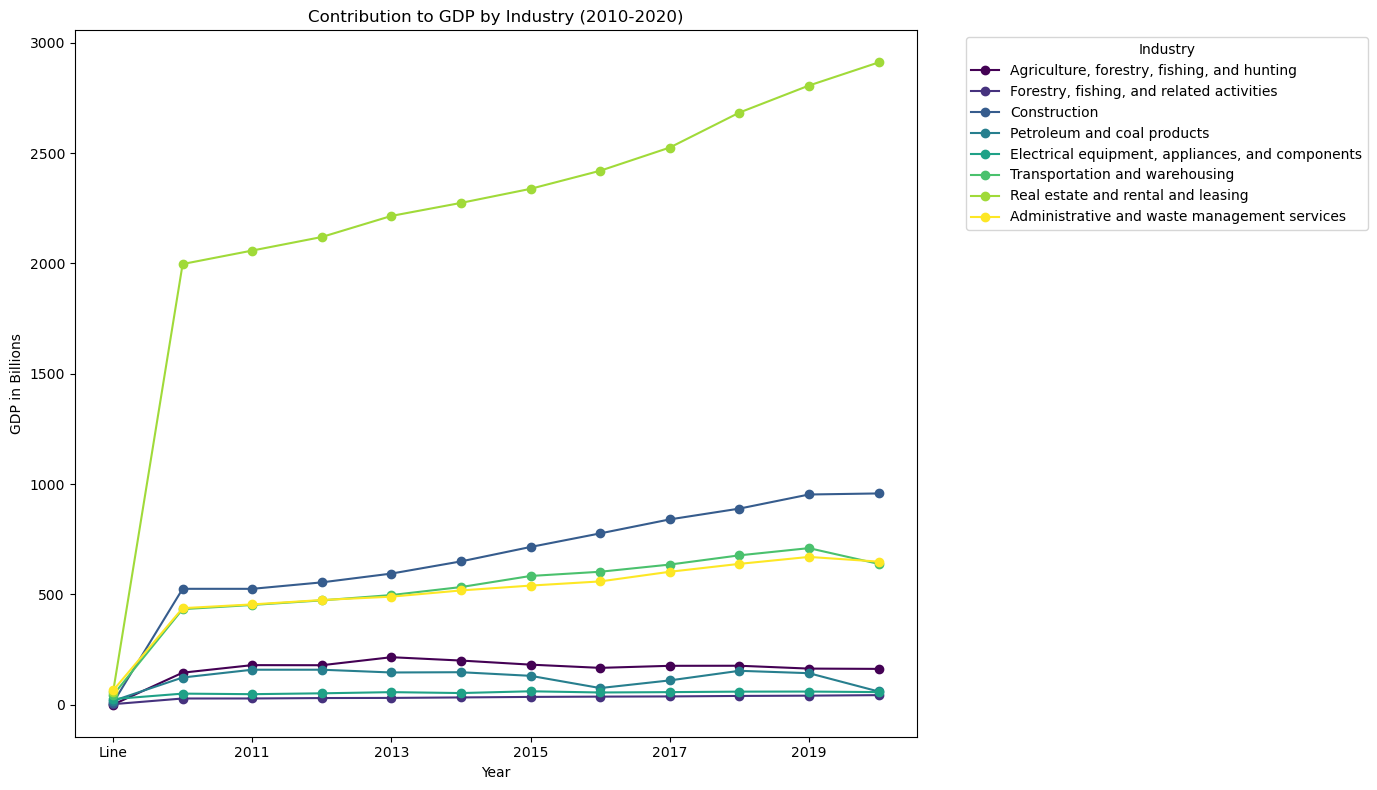

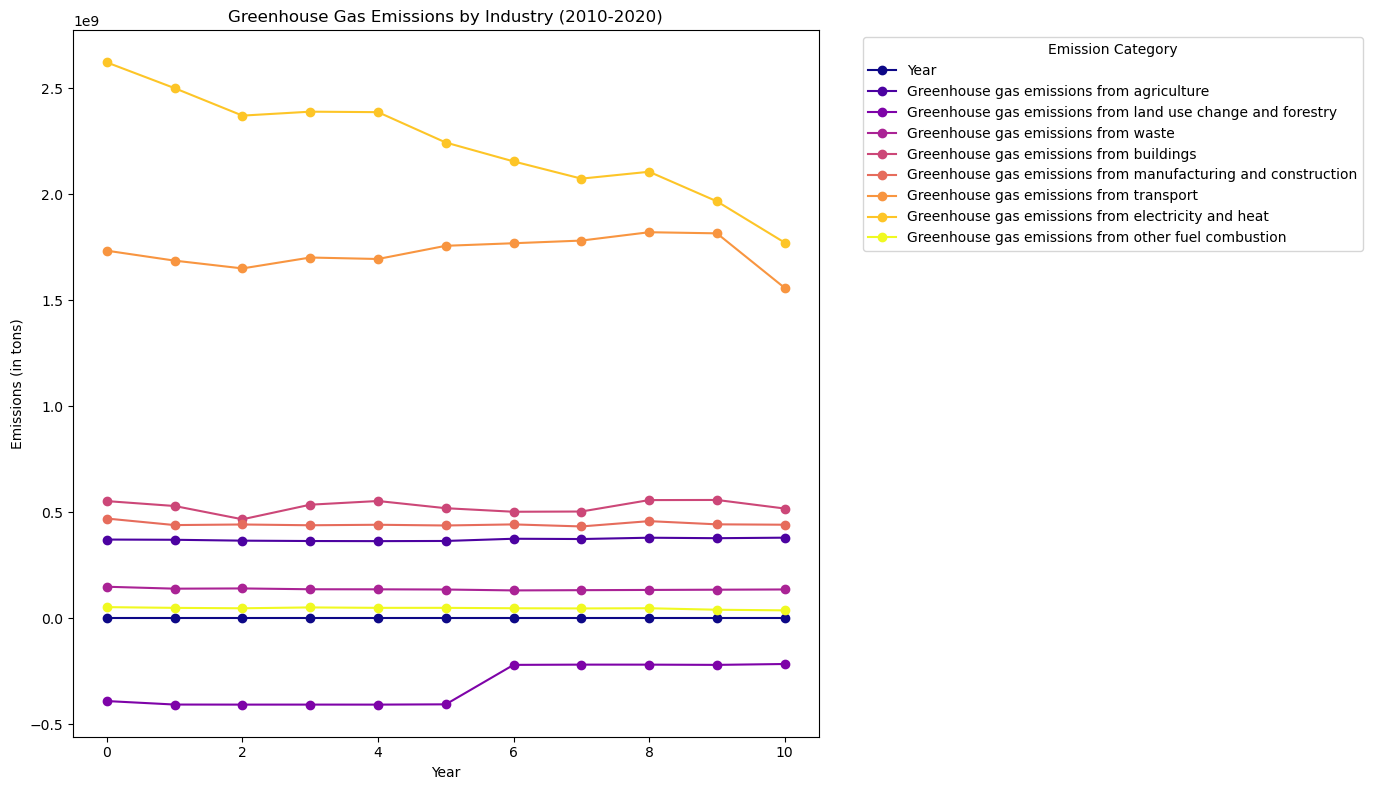

In [20]:
# Plot trends for each industry’s contribution to GDP over time
bea_filtered.plot(kind='line', figsize=(14, 8), marker='o', colormap='viridis')
plt.title("Contribution to GDP by Industry (2010-2020)")
plt.ylabel("GDP in Billions")
plt.xlabel("Year")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot trends for each emission category’s emissions over time
emission_filtered.plot(kind='line', figsize=(14, 8), marker='o', colormap='plasma')
plt.title("Greenhouse Gas Emissions by Industry (2010-2020)")
plt.ylabel("Emissions (in tons)")
plt.xlabel("Year")
plt.legend(title="Emission Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
# Calculate the growth of each industry from 2010 to 2020
industry_growth_gdp = bea_filtered.iloc[-1] - bea_filtered.iloc[0]

# Find the industry with the highest growth
most_growth_industry_gdp = industry_growth_gdp.idxmax()
growth_value_gdp = industry_growth_gdp.max()

print(f"Industry with the most significant growth in GDP: {most_growth_industry_gdp}")
print(f"Growth value in GDP: {growth_value_gdp}")


Industry with the most significant growth in GDP: Real estate and rental and leasing
Growth value in GDP: 2853.6


In [24]:
# Calculate the standard deviation (volatility) of each industry’s contribution to GDP
industry_volatility_gdp = bea_filtered.std(axis=0)

# Find the industry with the highest volatility
most_volatile_industry_gdp = industry_volatility_gdp.idxmax()
volatility_value_gdp = industry_volatility_gdp.max()

print(f"Industry with the most volatile impact on GDP: {most_volatile_industry_gdp}")
print(f"Volatility value in GDP: {volatility_value_gdp}")


Industry with the most volatile impact on GDP: Real estate and rental and leasing
Volatility value in GDP: 735.1318141955389


In [18]:
# Calculate the correlation between GDP contribution and emissions for each industry
correlations = bea_filtered.corrwith(emission_filtered, axis=0)

# Find the industry with the highest correlation
highest_correlation_industry = correlations.idxmax()
correlation_value = correlations.max()

print(f"Industry with the highest correlation between GDP and emissions: {highest_correlation_industry}")
print(f"Correlation value: {correlation_value}")


Industry with the highest correlation between GDP and emissions: nan
Correlation value: nan


C:\Users\mohsi\AppData\Local\Temp\ipykernel_13356\612658534.py:5: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  highest_correlation_industry = correlations.idxmax()


In [25]:
# Rename columns in the GDP dataset
gdp_filtered.rename(columns={
    'Agriculture, forestry, fishing, and hunting': 'Agriculture',
    'Forestry, fishing, and related activities': 'Forestry',
    'Administrative and waste management services': 'Waste Management',
    'Real estate and rental and leasing': 'Real Estate',
    'Construction': 'Construction',
    'Transportation and warehousing': 'Transportation',
    'Electrical equipment, appliances, and components': 'Electricity',
    'Petroleum and coal products': 'Petroleum'
}, inplace=True)

# Rename columns in the Emissions dataset
emission_filtered.rename(columns={
    'Greenhouse gas emissions from agriculture': 'Agriculture',
    'Greenhouse gas emissions from land use change and forestry': 'Forestry',
    'Greenhouse gas emissions from waste': 'Waste Management',
    'Greenhouse gas emissions from buildings': 'Real Estate',
    'Greenhouse gas emissions from manufacturing and construction': 'Construction',
    'Greenhouse gas emissions from transport': 'Transportation',
    'Greenhouse gas emissions from electricity and heat': 'Electricity',
    'Greenhouse gas emissions from other fuel combustion': 'Petroleum'
}, inplace=True)


C:\Users\mohsi\AppData\Local\Temp\ipykernel_13356\2243659988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_filtered.rename(columns={


In [29]:
print(gdp_filtered.head())
print(gdp_filtered.columns)

print(emission_filtered.head())
print(emission_filtered.columns)


                                                  Line   2010   2011   2012  \
Year                                                                          
Agriculture, forestry, fishing, and hunting          1  145.7  179.9  179.5   
Forestry, fishing, and related activities            3   28.7   28.8   30.7   
Construction                                         9  525.7  525.6  554.9   
Petroleum and coal products                         18  123.8  159.1  159.1   
Electrical equipment, appliances, and components    26   50.8   48.3   52.2   

                                                   2013   2014   2015   2016  \
Year                                                                           
Agriculture, forestry, fishing, and hunting       215.8  200.6  182.1  167.5   
Forestry, fishing, and related activities          31.4   33.5   35.9   37.2   
Construction                                      594.7  649.9  715.3  776.8   
Petroleum and coal products                   

In [28]:
# Rename the column to 'Year' if needed
gdp_filtered.rename_axis("Year", inplace=True)  # If year is the index but unnamed
emission_filtered.rename_axis("Year", inplace=True)  # If year is the index but unnamed

# If year is a column with a different name, rename it
gdp_filtered.rename(columns={'<CurrentYearColumnName>': 'Year'}, inplace=True)
emission_filtered.rename(columns={'<CurrentYearColumnName>': 'Year'}, inplace=True)

# Then set 'Year' as the index
gdp_filtered.set_index('Year', inplace=True)
emission_filtered.set_index('Year', inplace=True)

C:\Users\mohsi\AppData\Local\Temp\ipykernel_13356\3039086273.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_filtered.rename(columns={'<CurrentYearColumnName>': 'Year'}, inplace=True)


KeyError: "None of ['Year'] are in the columns"